Author: Rotem Gura Sadovsky

Goal: a project for a job interview at workforce development for CoSA

Data: a docx file with data tables reporting on enrollment in the Train for Jobs SA program as of Oct 2023. Tables include participant breakdown at different stages of the program by age, race, gender and industry breakdown by sectors.

Results: 
* Significant attrition at each stage, ~30%
* Age distribution is peaks in the 20s and 30s
* Race distribuion is ~65% hispanic, 15% black, 12% white
* Gender distribution is ~70% female ~30% male at enrollment, but 65/35 at hiring, and 60/40 at wage >=$15/hr
* Most selective industry sectors (hiring the fewer trainees) are IT and medical

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from docx.api import Document
import plotly.express as px
sns.set(font_scale=1.5)
sns.set_style('white')

In [47]:
def extract_table_into_df(table_obj):
    """Convert a docx table object into a data frame"""
    data = []
    
    keys = None
    for i, row in enumerate(table_obj.rows):
        text = (cell.text for cell in row.cells)
    
        if i == 0:
            keys = tuple(text)
            continue
        row_data = dict(zip(keys, text))
        data.append(row_data)
    
    return pd.DataFrame(data)

## Read and process data

In [48]:
document = Document('/Users/rotem/Downloads/10.1.2023 Train for Jobs SA Update.docx')
dfs = list(map(lambda x:extract_table_into_df(x), document.tables))

In [49]:
# Process the age breakdown data

age_breakdown = dfs[0].loc[5:14,:]
age_breakdown.columns = age_breakdown.loc[5].values
age_breakdown = age_breakdown.drop(5)
age_breakdown['Category'] = 'Enrolled'
age_breakdown = age_breakdown.rename(columns={"Age Ranges": "Age Range"})

age_breakdown_1 = dfs[8].loc[1:10,:]
age_breakdown_1.columns = age_breakdown_1.loc[1].values
age_breakdown_1 = age_breakdown_1.drop(1)
age_breakdown_1['Category'] = 'Completed'
age_breakdown_1.loc[7,'Age Range'] = age_breakdown_1.loc[7,'Age Range'].replace('–','-')
 
age_breakdown_2 = dfs[14].loc[4:13,:]
age_breakdown_2.columns = age_breakdown_2.loc[4].values
age_breakdown_2 = age_breakdown_2.drop(4)
age_breakdown_2['Category'] = 'Hired'
age_breakdown_2.loc[11,'Age Range'] = age_breakdown_2.loc[11,'Age Range'].replace(' ','')
age_breakdown_2.loc[10,'Age Range'] = age_breakdown_2.loc[10,'Age Range'].replace('–','-')

age_breakdown_3 = dfs[17].loc[7:16,:]
age_breakdown_3.columns = age_breakdown_3.loc[7].values
age_breakdown_3 = age_breakdown_3.drop(7)
age_breakdown_3['Category'] = 'Earn at least $15/hr'
age_breakdown_3 = age_breakdown_3.rename(columns={'Job Placements':'Participants'})
age_breakdown_3.loc[14,'Age Range'] = age_breakdown_3.loc[14,'Age Range'].replace(' ','')
age_breakdown_3.loc[13,'Age Range'] = age_breakdown_3.loc[13,'Age Range'].replace('–','-')

age_breakdown = pd.concat([age_breakdown, age_breakdown_1, age_breakdown_2, age_breakdown_3])
age_breakdown['Percentage'] = age_breakdown['Percentage'].str.rstrip('%').astype('float')

In [50]:
# Process the race breakdown data

race_breakdown = dfs[0].loc[15:25,:]
race_breakdown.columns = race_breakdown.loc[15].values
race_breakdown = race_breakdown.drop(15)
race_breakdown['Category'] = 'Enrolled'
race_breakdown.loc[16,'Race'] = 'American Indian/Alaskan Native' # written as "Alaska" without an "n" in source data

race_breakdown_1 = dfs[8].loc[11:21,:]
race_breakdown_1.columns = race_breakdown_1.loc[11].values
race_breakdown_1 = race_breakdown_1.drop(11)
race_breakdown_1['Category'] = 'Completed'
race_breakdown_1.loc[21,'Race'] = race_breakdown_1.loc[21,'Race'].strip(':')


race_breakdown_2 = dfs[14].loc[14:24,:]
race_breakdown_2.columns = race_breakdown_2.loc[14].values
race_breakdown_2 = race_breakdown_2.drop(14)
race_breakdown_2['Category'] = 'Hired'

race_breakdown_3 = dfs[17].loc[17:27,:]
race_breakdown_3.columns = race_breakdown_3.loc[17].values
race_breakdown_3 = race_breakdown_3.drop(17)
race_breakdown_3['Category'] = 'Earn at least $15/hr'
race_breakdown_3 = race_breakdown_3.rename(columns={'Job Placements':'Participants'})

race_breakdown = pd.concat([race_breakdown, race_breakdown_1, race_breakdown_2, race_breakdown_3])
race_breakdown['Percentage'] = race_breakdown['Percentage'].str.rstrip('%').astype('float')

In [51]:
# Process the race breakdown data

sex_breakdown = dfs[0].loc[26:,:]
sex_breakdown.columns = sex_breakdown.loc[26].values
sex_breakdown = sex_breakdown.drop(26)
sex_breakdown['Category'] = 'Enrolled'
sex_breakdown = sex_breakdown.rename(columns={'Percentage ':'Percentage'})

sex_breakdown_1 = dfs[8].loc[22:27,:]
sex_breakdown_1.columns = sex_breakdown_1.loc[22].values
sex_breakdown_1 = sex_breakdown_1.drop(22)
sex_breakdown_1['Category'] = 'Completed'
sex_breakdown_1.loc[27,'Gender'] = sex_breakdown_1.loc[27,'Gender'].strip(':')

sex_breakdown_2 = dfs[14].loc[25:30,:]
sex_breakdown_2.columns = sex_breakdown_2.loc[25].values
sex_breakdown_2 = sex_breakdown_2.drop(25)
sex_breakdown_2['Category'] = 'Hired'

sex_breakdown_3 = dfs[17].loc[28:33,:]
sex_breakdown_3.columns = sex_breakdown_3.loc[28].values
sex_breakdown_3 = sex_breakdown_3.drop(28)
sex_breakdown_3['Category'] = 'Earn at least $15/hr'
sex_breakdown_3 = sex_breakdown_3.rename(columns={'Job Placements':'Participants'})

sex_breakdown = pd.concat([sex_breakdown, sex_breakdown_1, sex_breakdown_2, sex_breakdown_3])
sex_breakdown['Percentage'] = sex_breakdown['Percentage'].str.rstrip('%').astype('float')

## Plot data

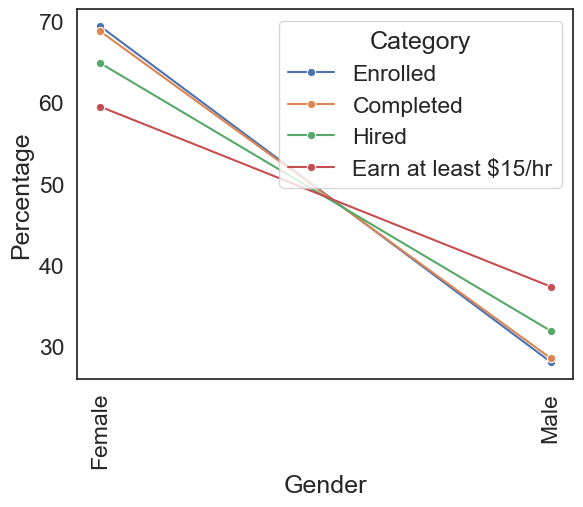

In [52]:
# Plot the data as contours with a different color for each category
mask = sex_breakdown['Gender'].isin(['Female','Male'])
ax = sns.lineplot(data=sex_breakdown[mask], x='Gender', y='Percentage', hue='Category',
                 marker='o')
ax.tick_params(axis='x', rotation=90)

Lines are misleading as if the data points are connected. Better plot as bars

<Axes: xlabel='Gender', ylabel='Percentage'>

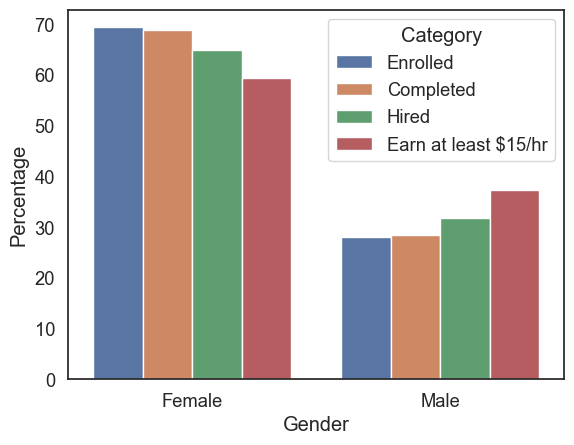

In [73]:
sns.set(font_scale=1.2)
sns.set_style('white')
mask = sex_breakdown['Gender'].isin(['Female','Male'])
sns.barplot(data=sex_breakdown[mask], x='Gender', y='Percentage', hue='Category')

This shows a clear trend of hiring fewer women and paying them less

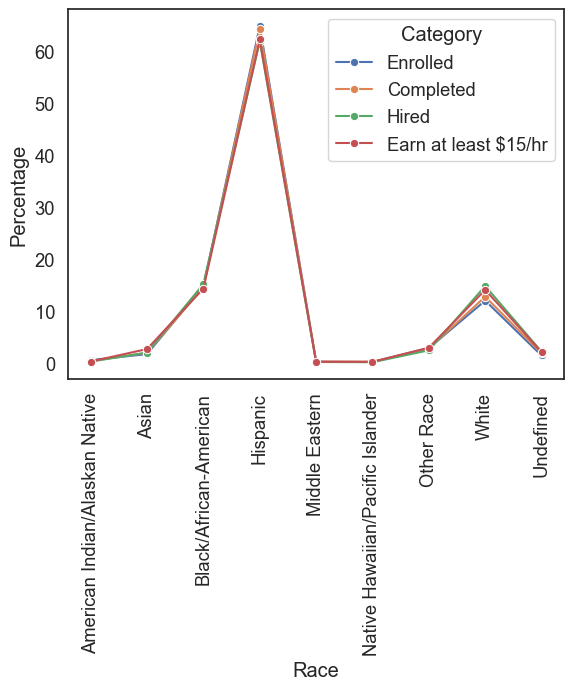

In [74]:
mask = race_breakdown['Race'] == 'Total'
ax = sns.lineplot(data=race_breakdown[~mask], x='Race', y='Percentage', hue='Category',
                 marker='o')
ax.tick_params(axis='x', rotation=90)

Remarkably similar trend across all program stages

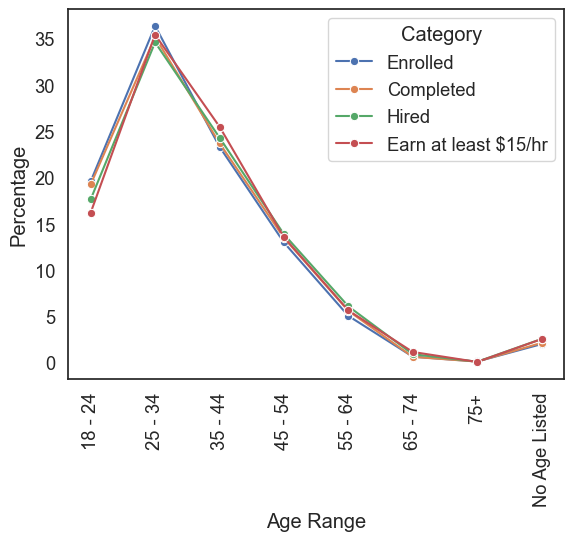

In [75]:
mask = age_breakdown['Age Range'] == 'Total'
ax = sns.lineplot(data=age_breakdown[~mask], x='Age Range', y='Percentage', hue='Category',
                 marker='o')
ax.tick_params(axis='x', rotation=90)

Here too, very similar trends across all program stages

In [65]:
# Plot industry-specific data

trainings_by_ind = dfs[1][['Industries','Trainings','Percentage']]
trainings_by_ind = trainings_by_ind.rename(columns={'Trainings':'Participants', 'Industries':'Industry'})
trainings_by_ind['Category'] = 'Training'

placements_by_ind = dfs[15]
placements_by_ind = placements_by_ind.rename(columns={'Job Placements':'Participants'})
placements_by_ind['Category'] = 'Placement'
placements_by_ind['Industry'] = placements_by_ind['Industry'].replace('Manufacturing & Logistics','Manufacturing/Logistics')

earn15_by_ind = dfs[17].loc[0:6]
earn15_by_ind = earn15_by_ind.rename(columns={'Job Placements':'Participants'})
earn15_by_ind['Category'] = 'Earn at least $15/hr'

industry_breakdown = pd.concat([trainings_by_ind, placements_by_ind, earn15_by_ind])
industry_breakdown['Percentage'] = industry_breakdown['Percentage'].str.rstrip('%').astype('float')
industry_breakdown['Participants'] = industry_breakdown['Participants'].str.replace(',','').astype('float')
industry_breakdown = industry_breakdown.reset_index()
industry_breakdown = industry_breakdown.replace('Manufacturing/Logistics','Mfg. / Logistics')

/var/folders/zc/6htm6_xn4ml1r8jv7fs4gzg80000gn/T/ipykernel_43463/3981055004.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



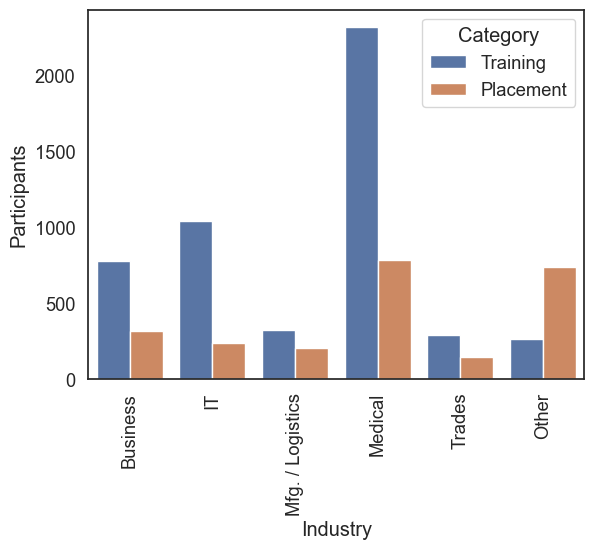

In [91]:
mask1 = industry_breakdown['Category'] == 'Earn at least $15/hr' # Showing this minimum wage data wasn't interesting
mask2 = industry_breakdown['Industry'] == 'Total'
ax = sns.barplot(data=industry_breakdown[~mask1][~mask2], x='Industry', y='Participants', hue='Category')
ax.tick_params(axis='x', rotation=90)

IT and Medical are the most selective! Mgf/logistics are the least selective. "Other" is unclear -- many more hired than trained -- perhaps misassignment in the records.